In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





In [2]:

data = pd.read_csv('cars-used.csv')

In [4]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


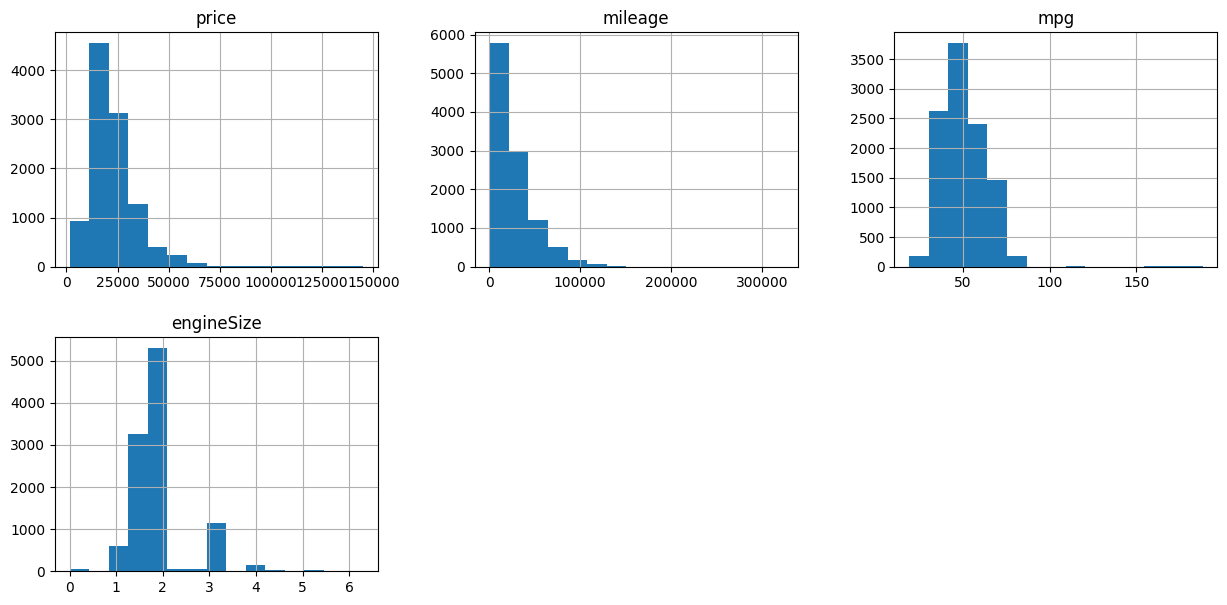

In [8]:

numerical_features = ['price',  'mileage',  'mpg', 'engineSize']
data[numerical_features].hist(bins=15, figsize=(15, 7), layout=(2, 3))
plt.show()

In [9]:

scaler = StandardScaler()
X = scaler.fit_transform(data[numerical_features])

#  PCA object
pca_obj = PCA()

# Fit and transform the dataset
pca_data = pca_obj.fit_transform(X)

In [10]:
from scipy.linalg import eigh
# Covariance matrix computation
cov_matrix = np.cov(X.T)

#eigen vectors and values
eig_vals, eig_vecs = eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Transformation of the original dataset
transformed_data = np.dot(X, eig_vecs)

# Compute the explained variance ratio
explained_variance_ratio = eig_vals / np.sum(eig_vals)

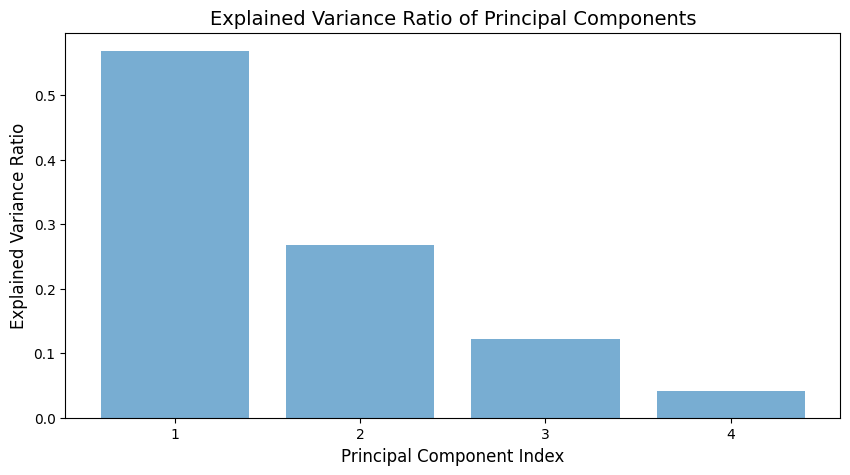

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(eig_vals)), explained_variance_ratio, alpha=0.6)
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio of Principal Components', fontsize=14)
plt.xticks(range(len(eig_vals)), np.arange(1, len(eig_vals) + 1))
plt.show()

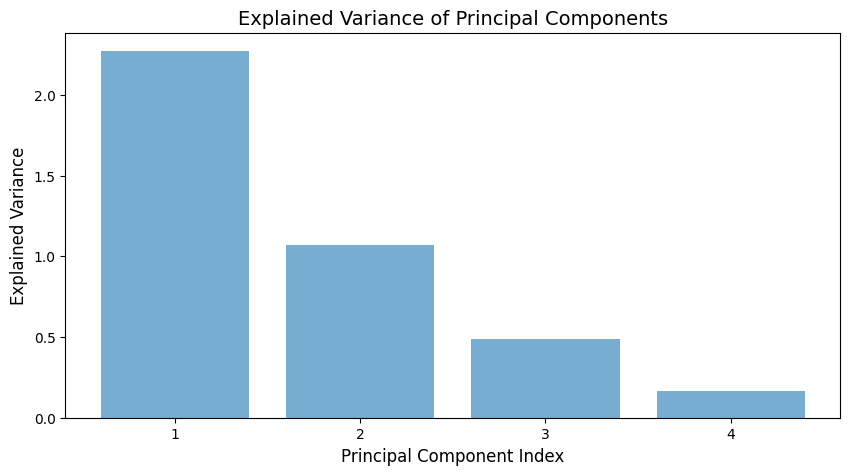

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(eig_vals)), eig_vals, alpha=0.6)
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance of Principal Components', fontsize=14)
plt.xticks(range(len(eig_vals)), np.arange(1, len(eig_vals) + 1))
plt.show()

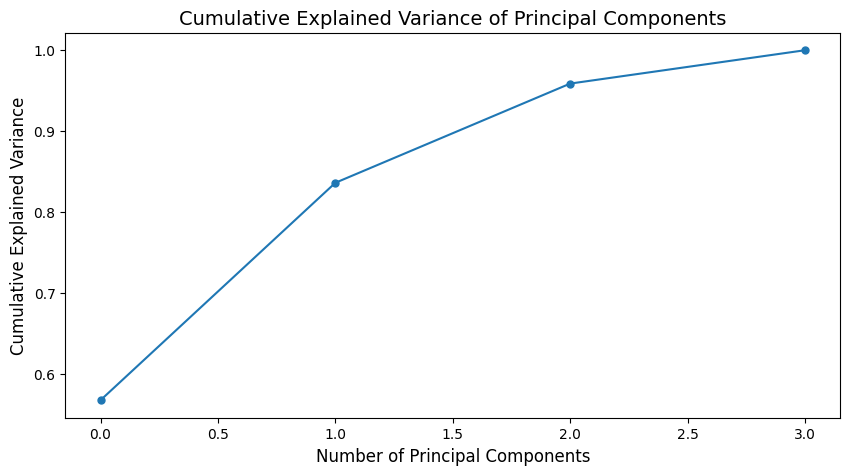

In [14]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_explained_variance, marker='o', markersize=5)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance of Principal Components', fontsize=14)
plt.show()

In [16]:
pca_obj.fit(X)
pca_data = pca_obj.transform(X)
cov_matrix_pca = np.cov(pca_data, rowvar=False, bias=True)

In [17]:
cov_matrix_pca

array([[ 2.27247874e+00,  1.14560696e-15,  4.68233543e-16,
         5.85042159e-16],
       [ 1.14560696e-15,  1.07316691e+00, -1.09898342e-17,
        -6.66050558e-17],
       [ 4.68233543e-16, -1.09898342e-17,  4.89706310e-01,
         1.32710574e-16],
       [ 5.85042159e-16, -6.66050558e-17,  1.32710574e-16,
         1.64648040e-01]])